In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics

In [63]:
appl = pd.read_csv("data/appl.csv")
appl

,Date,Price,Open,High,Low,Vol.,Change %
0,06/12/2023,183.79,181.27,183.89,180.97,53.57M,1.56%
1,06/09/2023,180.96,181.50,182.23,180.63,48.90M,0.22%
2,06/08/2023,180.57,177.90,180.84,177.46,50.21M,1.55%
3,06/07/2023,177.82,178.44,181.21,177.32,61.94M,-0.78%
4,06/06/2023,179.21,179.96,180.12,177.43,64.34M,-0.21%
...,...,...,...,...,...,...,...
4995,08/08/2003,0.35,0.36,0.36,0.35,137.85M,-2.78%
4996,08/07/2003,0.36,0.35,0.36,0.35,174.97M,2.86%
4997,08/06/2003,0.35,0.36,0.36,0.35,245.47M,-2.78%
4998,08/05/2003,0.36,0.38,0.38,0.36,249.44M,-5.26%


In [4]:
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Vol.      4999 non-null   object 
 6   Change %  5000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 273.6+ KB


In [5]:
appl = appl.dropna(axis=0)
appl.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [6]:
appl["Date"] = pd.to_datetime(appl["Date"])
appl = appl.set_index("Date")
appl

C:\Users\haseong\AppData\Local\Temp\ipykernel_28840\4191344750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appl["Date"] = pd.to_datetime(appl["Date"])


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-06-12,183.79,181.27,183.89,180.97,53.57M,1.56%
2023-06-09,180.96,181.50,182.23,180.63,48.90M,0.22%
2023-06-08,180.57,177.90,180.84,177.46,50.21M,1.55%
2023-06-07,177.82,178.44,181.21,177.32,61.94M,-0.78%
2023-06-06,179.21,179.96,180.12,177.43,64.34M,-0.21%
...,...,...,...,...,...,...
2003-08-08,0.35,0.36,0.36,0.35,137.85M,-2.78%
2003-08-07,0.36,0.35,0.36,0.35,174.97M,2.86%
2003-08-06,0.35,0.36,0.36,0.35,245.47M,-2.78%


In [7]:
def convertVol(num):
    if type(num) == float or type(num) == int:
        return num
    elif 'K' in num:
        return float(num.replace('K', '')) * 1000
    elif 'M' in num:
        return float(num.replace('M', '')) * 1000000 
    elif 'B' in num:
        return float(num.replace('B', '')) * 1000000000
    
appl['Vol.'] = appl['Vol.'].apply(convertVol)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-06-12,183.79,181.27,183.89,180.97,53570000.0,1.56%
2023-06-09,180.96,181.50,182.23,180.63,48900000.0,0.22%
2023-06-08,180.57,177.90,180.84,177.46,50210000.0,1.55%
2023-06-07,177.82,178.44,181.21,177.32,61940000.0,-0.78%
2023-06-06,179.21,179.96,180.12,177.43,64340000.0,-0.21%
...,...,...,...,...,...,...
2003-08-08,0.35,0.36,0.36,0.35,137850000.0,-2.78%
2003-08-07,0.36,0.35,0.36,0.35,174970000.0,2.86%
2003-08-06,0.35,0.36,0.36,0.35,245470000.0,-2.78%


In [8]:
def convertCharge(num):
    if type(num) == float or type(num) == int:
        return num
    elif '%' in num:
        return float(num.replace('%', ''))
    
appl["Change %"] = appl["Change %"].apply(convertCharge)
appl

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-06-12,183.79,181.27,183.89,180.97,53570000.0,1.56
2023-06-09,180.96,181.50,182.23,180.63,48900000.0,0.22
2023-06-08,180.57,177.90,180.84,177.46,50210000.0,1.55
2023-06-07,177.82,178.44,181.21,177.32,61940000.0,-0.78
2023-06-06,179.21,179.96,180.12,177.43,64340000.0,-0.21
...,...,...,...,...,...,...
2003-08-08,0.35,0.36,0.36,0.35,137850000.0,-2.78
2003-08-07,0.36,0.35,0.36,0.35,174970000.0,2.86
2003-08-06,0.35,0.36,0.36,0.35,245470000.0,-2.78


In [9]:
appl.describe()

,Price,Open,High,Low,Vol.,Change %
count,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4999.000000
mean,38.098974,38.073147,38.501766,37.659396,4.143011e+08,0.131772
std,47.987620,47.937177,48.520649,47.397391,3.954786e+08,2.374355
min,0.350000,0.350000,0.350000,0.340000,3.520000e+07,-75.070000
25%,4.915000,4.940000,4.990000,4.855000,1.212850e+08,-0.865000
50%,19.670000,19.760000,19.890000,19.460000,2.820400e+08,0.040000
75%,43.815000,43.775000,44.070000,43.545000,5.844350e+08,1.240000
max,183.790000,182.630000,184.950000,180.970000,3.370000e+09,13.870000


<AxesSubplot: >

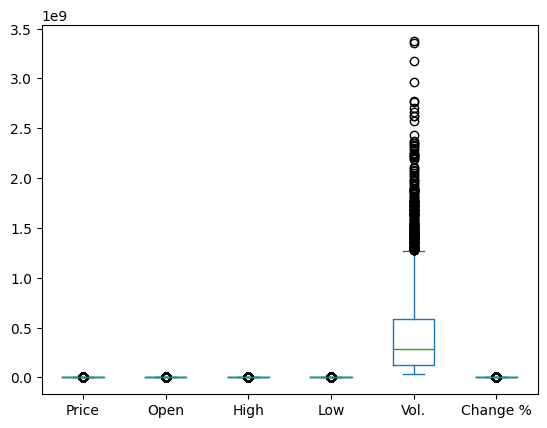

In [10]:
appl.plot.box()

Text(0, 0.5, 'Price')

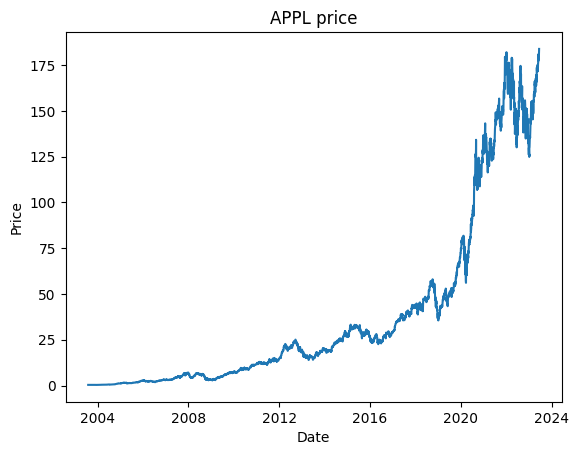

In [11]:
plt.plot(appl.index, appl["Price"])
plt.title("APPL price")
plt.xlabel("Date")
plt.ylabel("Price")

In [12]:
X = appl.iloc[:-1].values
y = appl.iloc[1:, 0].values

rf = RandomForestRegressor(oob_score=True, random_state=42) 
rf.fit(X, y)

yhat_rf = rf.predict(X)
mae_rf = metrics.mean_absolute_error(y, yhat_rf)
mse_rf = metrics.mean_squared_error(y, yhat_rf)

print(f'OOB score:      {rf.oob_score_}')
print(f'MAE:            {mae_rf}')
print(f'RMSE:           {mse_rf}')

OOB score:      0.9998390381641025
MAE:            0.09206418567427033
RMSE:           0.049880548403362104


MAE:            0.7580081818181891
RMSE:           1.0885582031818202
R^2:           0.9945237730679486


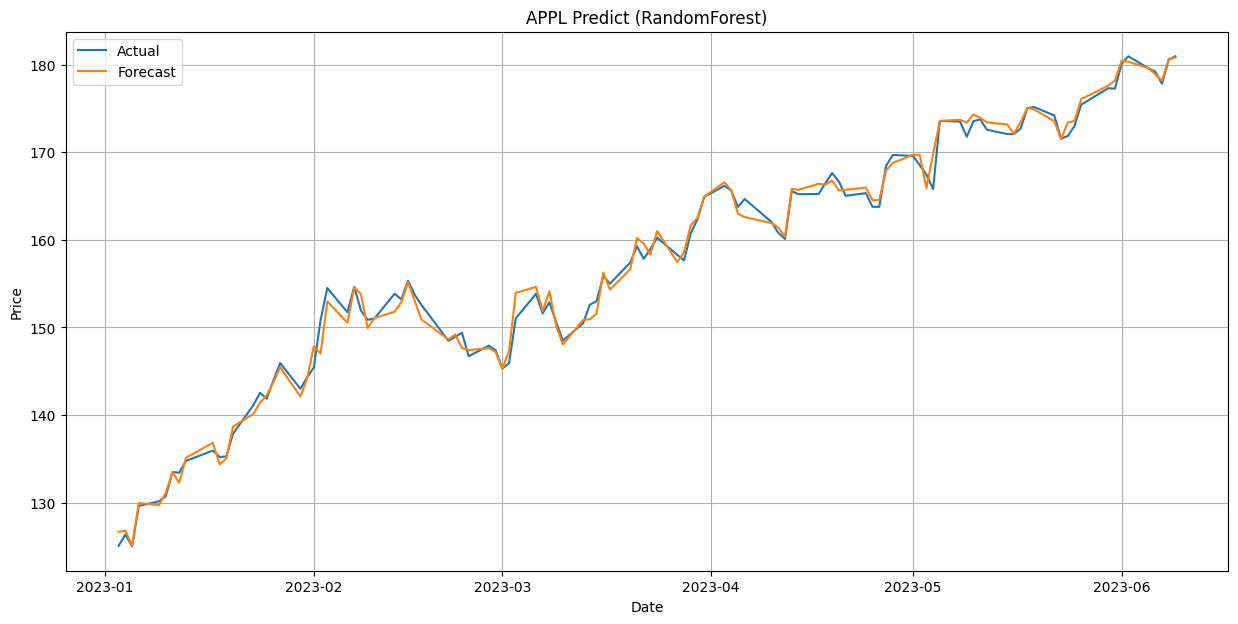

In [52]:
train = appl[appl.index.year < 2023]
valid = appl[appl.index.year == 2023]

X_train = train.iloc[:-1].values
X_valid = valid.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_valid = valid.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42) 
rf.fit(X_train, y_train)

yhat = rf.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, yhat)
mse = metrics.mean_squared_error(y_valid, yhat)
R2 = rf.score(X_valid, y_valid)

print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(valid.iloc[1:].index), y_valid)
plt.plot(pd.to_datetime(valid.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (RandomForest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

***************** Neighbors = 3 *******************
MAE:            1.0707575757575731
RMSE:           2.3177831313131265
R^2:           0.988339891822733


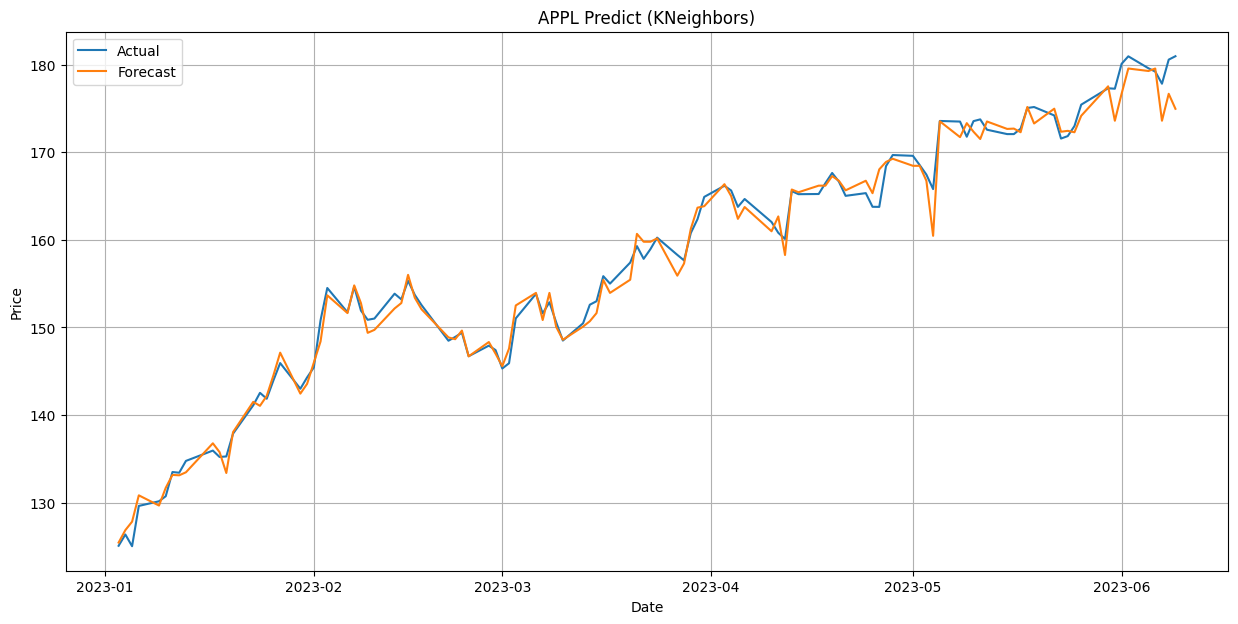

In [54]:
train = appl[appl.index.year < 2023]
valid = appl[appl.index.year == 2023]

X_train = train.iloc[:-1].values
X_valid = valid.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_valid = valid.iloc[1:, 0].values

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)


kn = KNeighborsRegressor(3) 
kn.fit(X_train, y_train)

yhat = kn.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, yhat)
mse = metrics.mean_squared_error(y_valid, yhat)
R2 = kn.score(X_valid, y_valid)

print(f'***************** Neighbors = {3} *******************')
print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(valid.iloc[1:].index), y_valid)
plt.plot(pd.to_datetime(valid.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (KNeighbors)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

해외주식 경우에는 api 응답속도가 느려서 예측프로그램을 참고로 수동매매 하는게 나음 <br>
정확도가 99.4%라고 치면 1~2% 오르는 주식같은 경우에는 오차가 작아도 엄청 크게 작용함. <br>
예측한값 -2%라고 보수적으로 잡아놓고 ex) 예측상승률-2% = 5%일 때 매도 <br>
여러 모델을 만들어 놓고 모든 모델이 오른다고 예측한다면 매수.


---

# APPL2 Dataset
### 1980 ~ 2023

In [25]:
appl2 = pd.read_csv("data/AAPL2.csv")
appl2

# Adj Close: 조정 종가
# 조정 종가:  적용 가능한 모든 분할 및 배당 분배에 대한 조정 후 종가

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...,...
10743,2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
10744,2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
10745,2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400
10746,2023-07-31,196.059998,196.490005,195.259995,196.449997,196.449997,38824100


In [26]:
appl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10748 entries, 0 to 10747
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10748 non-null  object 
 1   Open       10748 non-null  float64
 2   High       10748 non-null  float64
 3   Low        10748 non-null  float64
 4   Close      10748 non-null  float64
 5   Adj Close  10748 non-null  float64
 6   Volume     10748 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 587.9+ KB


In [27]:
appl2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
appl2["Date"] = pd.to_datetime(appl2["Date"])
appl2 = appl2.set_index("Date")
appl2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-07-26,193.669998,195.639999,193.320007,194.500000,194.500000,47471900
2023-07-27,196.020004,197.199997,192.550003,193.220001,193.220001,47460200
2023-07-28,194.669998,196.630005,194.139999,195.830002,195.830002,48291400


In [29]:
appl2 = appl2[["Close", "Open", "High", "Low", "Adj Close", "Volume"]]

In [30]:
appl2.describe()

,Close,Open,High,Low,Adj Close,Volume
count,10748.000000,10748.000000,10748.000000,10748.000000,10748.000000,1.074800e+04
mean,18.486660,18.473959,18.681507,18.274773,17.777747,3.240696e+08
std,38.974991,38.937090,39.390904,38.517619,38.624003,3.369774e+08
min,0.049107,0.049665,0.049665,0.049107,0.038102,0.000000e+00
25%,0.292098,0.291713,0.299107,0.284598,0.239986,1.183220e+08
50%,0.497768,0.497812,0.508125,0.491071,0.412357,2.116212e+08
75%,18.075356,18.067321,18.204285,17.907947,15.692136,4.040575e+08
max,196.449997,196.240005,198.229996,195.279999,196.449997,7.421641e+09


<AxesSubplot: >

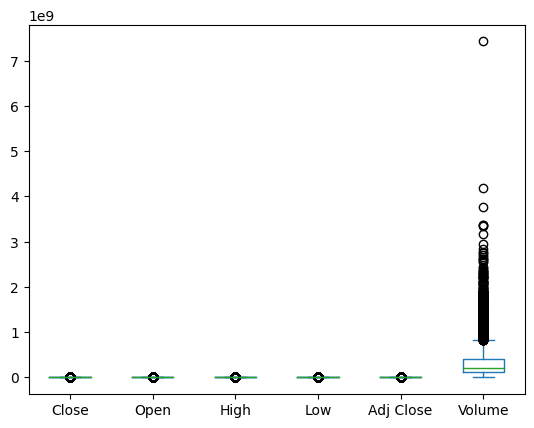

In [31]:
appl2.plot.box()

Text(0, 0.5, 'Price')

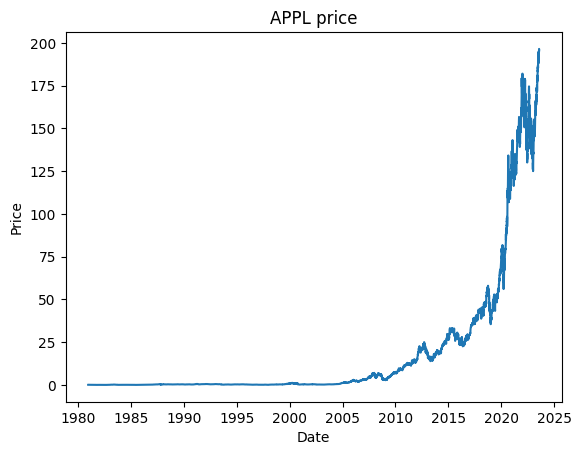

In [32]:
plt.plot(appl2.index, appl2["Close"])
plt.title("APPL price")
plt.xlabel("Date")
plt.ylabel("Price")

In [33]:
X = appl2.iloc[:-1].values
y = appl2.iloc[1:, 0].values

rf = RandomForestRegressor(oob_score=True, random_state=42) 
rf.fit(X, y)

yhat_rf = rf.predict(X)
mae_rf = metrics.mean_absolute_error(y, yhat_rf)
mse_rf = metrics.mean_squared_error(y, yhat_rf)

print(f'OOB score:      {rf.oob_score_}')
print(f'MAE:            {mae_rf}')
print(f'RMSE:           {mse_rf}')

OOB score:      0.9994883544525358
MAE:            0.1042625886098446
RMSE:           0.10681481050320442


MAE:            4.543173451666642
RMSE:           47.74688302997687
R^2:           0.8590347480380821


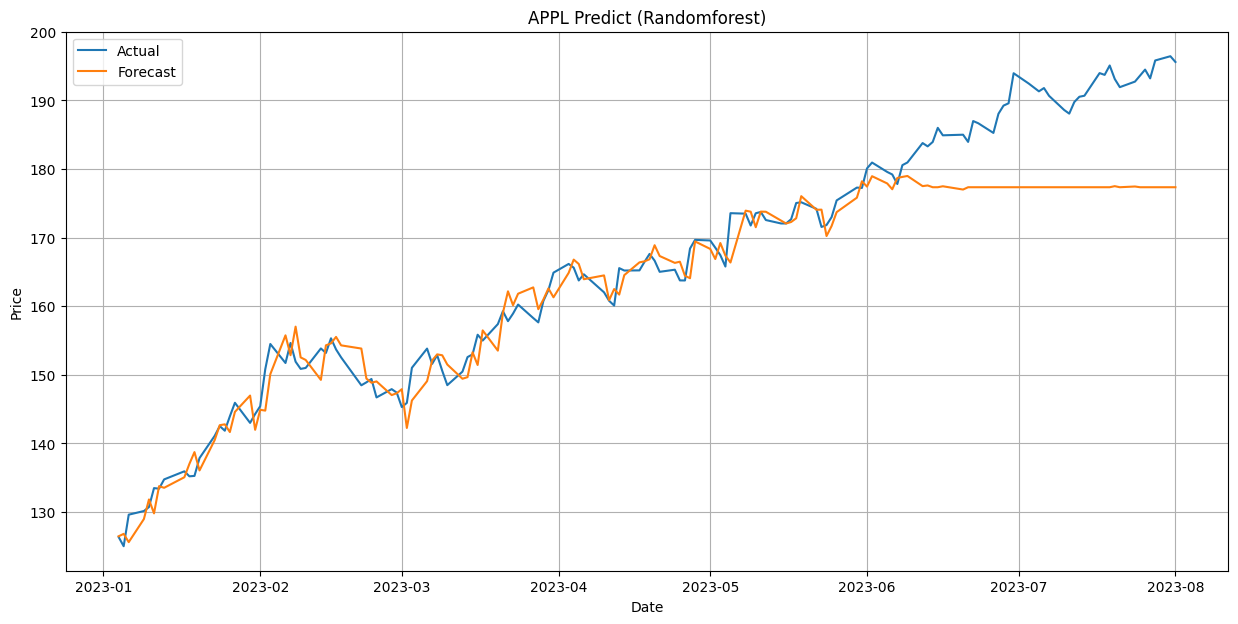

In [65]:
# train, test 데이터셋 분리
# data는 더 많은데 왜 성능이 더 안좋을까
# 중간부터 갑자기 예측을 왜 아예 못할까

train = appl2[appl2.index.year < 2023]
valid = appl2[appl2.index.year == 2023]

X_train = train.iloc[:-1].values
X_valid = valid.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_valid = valid.iloc[1:, 0].values

rf = RandomForestRegressor(random_state=42) 
rf.fit(X_train, y_train)

yhat = rf.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, yhat)
mse = metrics.mean_squared_error(y_valid, yhat)
R2 = rf.score(X_valid, y_valid)

print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(valid.iloc[1:].index), y_valid)
plt.plot(pd.to_datetime(valid.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (Randomforest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

***************** Neighbors = 9 *******************
MAE:            4.323155584876541
RMSE:           42.594387096313966
R^2:           0.8742466915499872


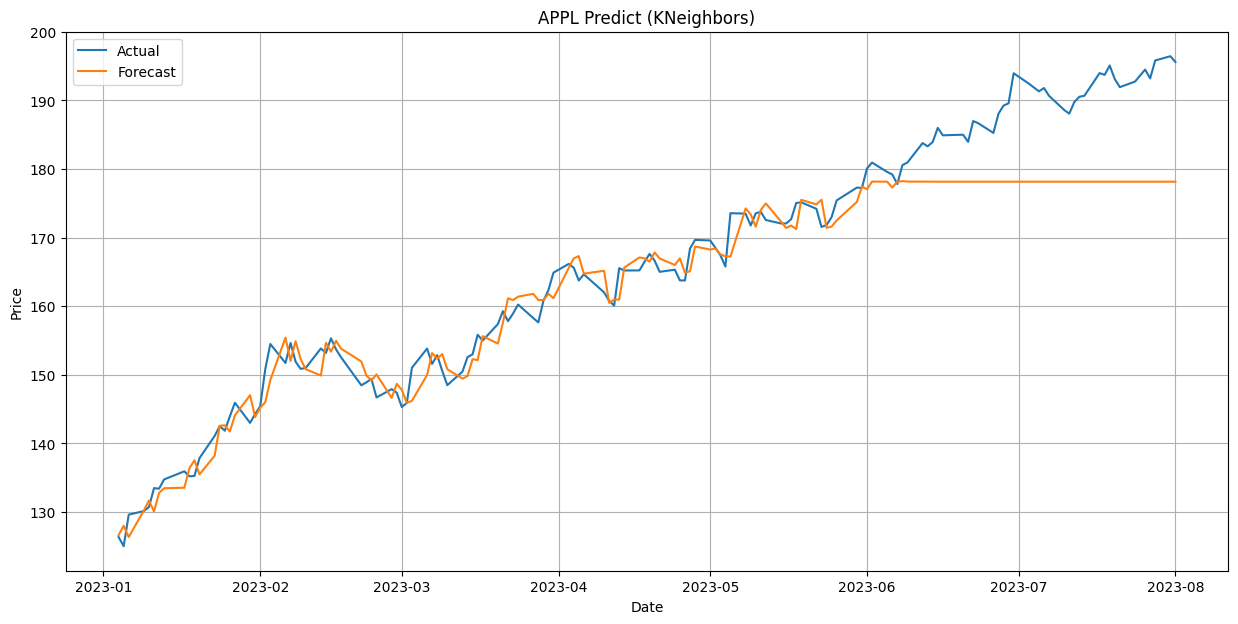

In [61]:
# KNeighbors

train = appl2[appl2.index.year < 2023]
valid = appl2[appl2.index.year == 2023]

X_train = train.iloc[:-1].values
X_valid = valid.iloc[:-1].values
y_train = train.iloc[1:, 0].values
y_valid = valid.iloc[1:, 0].values

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_valid = ss.transform(X_valid)


kn = KNeighborsRegressor(9) 
kn.fit(X_train, y_train)

yhat = kn.predict(X_valid)
mae = metrics.mean_absolute_error(y_valid, yhat)
mse = metrics.mean_squared_error(y_valid, yhat)
R2 = kn.score(X_valid, y_valid)

print(f'***************** Neighbors = {9} *******************')
print(f'MAE:            {mae}')
print(f'RMSE:           {mse}')
print(f'R^2:           {R2}')

plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(valid.iloc[1:].index), y_valid)
plt.plot(pd.to_datetime(valid.iloc[1:].index), yhat)
plt.legend(["Actual", "Forecast"])
plt.title("APPL Predict (KNeighbors)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()